In [1]:
import pandas as pd
import numpy as np
import pickle
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
colors_plain = ['#333333', '#1F77B4', 'grey']
colors = ['#2878B5', '#9AC9DB', '#F8AC8C', '#C82423', '#FF8884']

In [2]:
def get_heat_coef(fname):
    coefs = pd.read_csv('Data/'+fname)
    coefs.columns = ['x', 'coef', 'se', 't', 'p', 'conf_int_l', 'conf_int_u']
    temp = coefs[coefs.x == 'cut_maxtemp(35, Inf]']
    return np.exp([temp.coef.iloc[0], temp.conf_int_l.iloc[0], temp.conf_int_u.iloc[0]])-1

## Fig. 2a

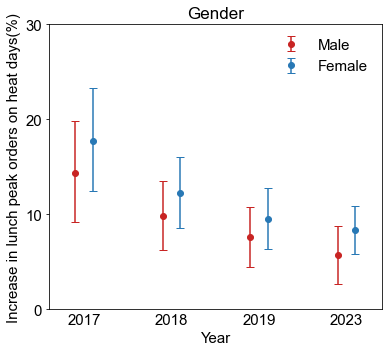

In [3]:
fig, ax = plt.subplots(figsize = (5.5, 5))
for loc, name in enumerate(['17', '18', '19', '23']):
    x, l, u= get_heat_coef('city_'+name+'_bin5_noon_cnt_male.csv')
    if loc == 0:
        plt.errorbar([loc-0.1], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[3], capsize = 4, label = 'Male')
    else:
        plt.errorbar([loc-0.1], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[3], capsize = 4)
    x, l, u= get_heat_coef('city_'+name+'_bin5_noon_cnt_female.csv')
    if loc == 0:
        plt.errorbar([loc+0.1], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[0], capsize = 4, label = 'Female')
    else:
        plt.errorbar([loc+0.1], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[0], capsize = 4)
plt.legend(frameon = False, fontsize = 15, loc = 'upper right')
plt.xlim(-0.4, 3.4)
plt.yticks([0, 0.10, 0.20, 0.30], [0,10,20, 30], size = 15)
plt.xticks([0,1,2,3], ['2017', '2018', '2019', '2023'], size = 15)
plt.xlabel('Year', size = 15)
plt.ylim(0, 0.30)
ax.tick_params(axis = 'x', length = 0)
celsius_symbol = chr(176)
plt.ylabel('Increase in lunch peak orders on heat days(%)', size = 15)
plt.title('Gender', size = 17)
plt.tight_layout()
plt.show()

## Fig. 2b

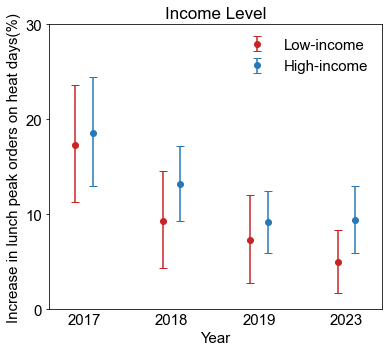

In [4]:
fig, ax = plt.subplots(figsize = (5.5, 5))
for loc, name in enumerate(['17', '18', '19', '23']):
    x, l, u= get_heat_coef('city_'+name+'_bin5_noon_cnt_lowincome.csv')
    if loc == 0:
        plt.errorbar([loc-0.1], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[3], capsize = 4, label = 'Low-income')
    else:
        plt.errorbar([loc-0.1], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[3], capsize = 4)
    x, l, u= get_heat_coef('city_'+name+'_bin5_noon_cnt_highincome.csv')
    if loc == 0:
        plt.errorbar([loc+0.1], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[0], capsize = 4, label = 'High-income')
    else:
        plt.errorbar([loc+0.1], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[0], capsize = 4)
plt.legend(frameon = False, fontsize = 15, loc = 'upper right')
plt.xlim(-0.4, 3.4)
plt.yticks([0, 0.10, 0.20, 0.30], [0,10,20, 30], size = 15)
plt.xticks([0,1,2,3], ['2017', '2018', '2019', '2023'], size = 15)
plt.xlabel('Year', size = 15)
plt.ylim(0, 0.30)
ax.tick_params(axis = 'x', length = 0)
celsius_symbol = chr(176)
plt.ylabel('Increase in lunch peak orders on heat days(%)', size = 15)
plt.title('Income Level', size = 17)
plt.tight_layout()
plt.show()

## Fig. 2c

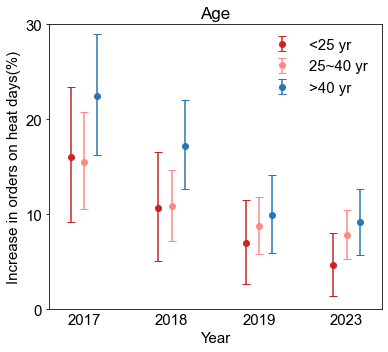

In [5]:
fig, ax = plt.subplots(figsize = (5.5, 5))
for loc, name in enumerate(['17', '18', '19', '23']):
    x, l, u= get_heat_coef('city_'+name+'_bin5_noon_cnt_lowage.csv')
    if loc == 0:
        plt.errorbar([loc-0.15], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[3], capsize = 4, label = '<25 yr')
    else:
        plt.errorbar([loc-0.15], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[3], capsize = 4)
    x, l, u= get_heat_coef('city_'+name+'_bin5_noon_cnt_midage.csv')
    if loc == 0:
        plt.errorbar([loc], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[4], capsize = 4, label = '25~40 yr')
    else:
        plt.errorbar([loc], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[4], capsize = 4)
    x, l, u= get_heat_coef('city_'+name+'_bin5_noon_cnt_highage.csv')
    if loc == 0:
        plt.errorbar([loc+0.15], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[0], capsize = 4, label = '>40 yr')
    else:
        plt.errorbar([loc+0.15], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[0], capsize = 4)
plt.legend(frameon = False, fontsize = 15, loc = 'upper right')
plt.xlim(-0.4, 3.4)
plt.ylim(0, 0.30)
plt.yticks([0, 0.10, 0.20, 0.30], [0,10,20, 30], size = 15)
plt.xticks([0,1,2,3], ['2017', '2018', '2019', '2023'], size = 15)
ax.tick_params(axis = 'x', length = 0)
celsius_symbol = chr(176)
plt.xlabel('Year', size = 15)
plt.ylabel('Increase in orders on heat days(%)', size = 15)
plt.title('Age', size = 17)
plt.tight_layout()
plt.show()

## Fig. 2e

In [6]:
def get_coefs(fname, tmin = 20, tmax = 40):
    coefs = pd.read_csv('Data/'+fname)
    coefs.columns = ['x', 'coef', 'se', 't', 'p', 'conf_int_l', 'conf_int_u']
    xs = []
    ls = []
    us = []
    ts = []
    for t in range(tmin, tmax+1):
        try:
            if t < tmax:
                temp = coefs[coefs.x == 'cut_maxtemp(%d,%d]' % (t, t+1)]
            else:
                temp = coefs[coefs.x == 'cut_maxtemp(%d, Inf]' % t]
            xs.append(temp.coef.iloc[0])
            ls.append(temp.conf_int_l.iloc[0])
            us.append(temp.conf_int_u.iloc[0])
            ts.append(t)
        except:
            pass
    return xs, ls, us, ts

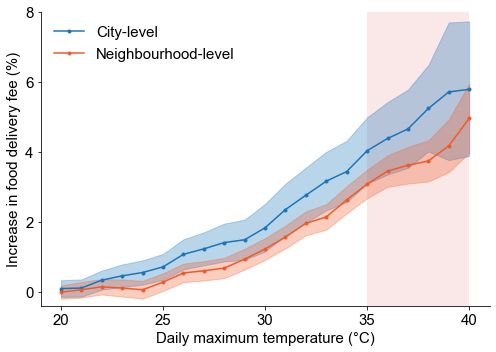

In [7]:
colors1 = ['#1A75BB', '#009344', '#F05A28']
plt.figure(figsize = (7, 5))
xs, ls, us, ts = get_coefs('city_4year_040_noon_delivery.csv')
plt.plot(ts, np.exp(xs) - 1, color = colors1[0], marker = '.', label = 'City-level')
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors1[0], alpha = 0.3)
xs, ls, us, ts = get_coefs('neighbour_4year_040_noon_delivery.csv')
plt.plot(ts, np.exp(xs) - 1, color = colors1[2], marker = '.', label = 'Neighbourhood-level')
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors1[2], alpha = 0.3)
plt.bar(x = [37.5], height = [0.48], width = 5, bottom = [-0.07], color = '#eea2a4', alpha = 0.25, zorder = 0)
plt.ylim(-0.004, 0.08)
plt.xlim(19, 41)
plt.yticks([0, 0.02, 0.04, 0.06, 0.08], [0, 2, 4, 6, 8], size = 15)
plt.xticks([20, 25, 30, 35, 40], size = 15)
celsius_symbol = chr(176)
plt.xlabel('Daily maximum temperature ('+celsius_symbol+'C)', size = 15)
plt.ylabel('Increase in food delivery fee (%)', size = 15)
plt.legend(fontsize = 15, frameon = False, loc = 'upper left')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

## Fig. 2d

In [8]:
with open('Data/user_avg_delivery_fee.pkl', 'rb') as f:
    user_avg_delivery_fee = pickle.load(f)

In [9]:
def np_std(data, p = 0.95):
    mean = np.mean(data)
    std_err = stats.sem(data)
    margin_of_error = std_err * stats.t.ppf((1 + p) / 2, len(data) - 1)
    confidence_interval = (mean - margin_of_error, mean + margin_of_error)
    return confidence_interval

3.3595126548944068
3.3590017540716763
3.631410888309424
3.294754328369111
3.518506986840682
3.364666352936838
3.2572271396228416


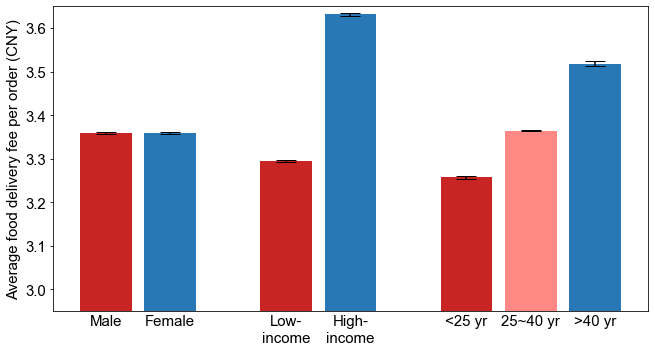

In [10]:
fig, ax = plt.subplots(figsize = (9.2, 5))
x = np.mean(user_avg_delivery_fee['female'])
print(x)
plt.bar([-1.6], [x], color = colors[0])
l, u = np_std(user_avg_delivery_fee['female'])
plt.errorbar([-1.6], [x], yerr = ([x-l], [u-x]), color ='black', capsize = 10)

x = np.mean(user_avg_delivery_fee['male'])
print(x)
plt.bar([-2.6], [x], color = colors[3])
l, u = np_std(user_avg_delivery_fee['male'])
plt.errorbar([-2.6], [x], yerr = ([x-l], [u-x]), color ='black', capsize = 10)

x = np.mean(user_avg_delivery_fee['highincome'])
print(x)
plt.bar([1.2], [x], color = colors[0])
l, u = np_std(user_avg_delivery_fee['highincome'])
plt.errorbar([1.2], [x], yerr = ([x-l], [u-x]), color ='black', capsize = 10)

x = np.mean(user_avg_delivery_fee['lowincome'])
print(x)
plt.bar([0.2], [x], color = colors[3])
l, u = np_std(user_avg_delivery_fee['lowincome'])
plt.errorbar([0.2], [x], yerr = ([x-l], [u-x]), color ='black', capsize = 10)

x = np.mean(user_avg_delivery_fee['agehigh'])
print(x)
plt.bar([5], [x], color = colors[0])
l, u = np_std(user_avg_delivery_fee['agehigh'])
plt.errorbar([5], [x], yerr = ([x-l], [u-x]), color ='black', capsize = 10)

x = np.mean(user_avg_delivery_fee['agemid'])
print(x)
plt.bar([4], [x], color = colors[4])
l, u = np_std(user_avg_delivery_fee['agemid'])
plt.errorbar([4], [x], yerr = ([x-l], [u-x]), color ='black', capsize = 10)

x = np.mean(user_avg_delivery_fee['agelow'])
print(x)
plt.bar([3], [x], color = colors[3])
l, u = np_std(user_avg_delivery_fee['agelow'])
plt.errorbar([3], [x], yerr = ([x-l], [u-x]), color ='black', capsize = 10)

plt.xticks([])
plt.ylabel('Average food delivery fee per order (CNY)', size = 15)
ax.tick_params(axis = 'x', length = 0)
plt.yticks(size = 15)
plt.xticks([-1.6, -2.6, 1.2,0.2,5,4,3], ['Female', 'Male', 'High-\nincome', 'Low-\nincome', '>40 yr', '25~40 yr', '<25 yr'], size = 15)
plt.ylim(2.95, 3.65)
plt.tight_layout()
plt.show()

## Fig. S4

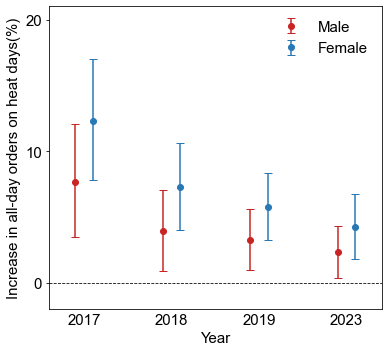

In [11]:
fig, ax = plt.subplots(figsize = (5.5, 5))
for loc, name in enumerate(['17', '18', '19', '23']):
    x, l, u= get_heat_coef('city_'+name+'_bin5_cnt_male.csv')
    if loc == 0:
        plt.errorbar([loc-0.1], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[3], capsize = 4, label = 'Male')
    else:
        plt.errorbar([loc-0.1], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[3], capsize = 4)
    x, l, u= get_heat_coef('city_'+name+'_bin5_cnt_female.csv')
    if loc == 0:
        plt.errorbar([loc+0.1], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[0], capsize = 4, label = 'Female')
    else:
        plt.errorbar([loc+0.1], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[0], capsize = 4)
plt.legend(frameon = False, fontsize = 15, loc = 'upper right')
plt.xlim(-0.4, 3.4)
plt.yticks([0, 0.10, 0.20, 0.30], [0,10,20, 30], size = 15)
plt.xticks([0,1,2,3], ['2017', '2018', '2019', '2023'], size = 15)
plt.xlabel('Year', size = 15)
plt.ylim(-0.02, 0.21)
plt.hlines(0, -0.4, 3.4, color = 'black', ls = '--', lw = 0.8)
ax.tick_params(axis = 'x', length = 0)
celsius_symbol = chr(176)
plt.ylabel('Increase in all-day orders on heat days(%)', size = 15)
plt.tight_layout()
plt.show()

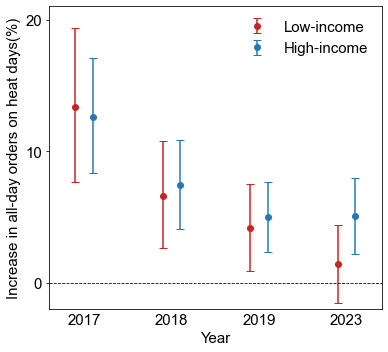

In [12]:
fig, ax = plt.subplots(figsize = (5.5, 5))
for loc, name in enumerate(['17', '18', '19', '23']):
    x, l, u= get_heat_coef('city_'+name+'_bin5_cnt_lowincome.csv')
    if loc == 0:
        plt.errorbar([loc-0.1], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[3], capsize = 4, label = 'Low-income')
    else:
        plt.errorbar([loc-0.1], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[3], capsize = 4)
    x, l, u= get_heat_coef('city_'+name+'_bin5_cnt_highincome.csv')
    if loc == 0:
        plt.errorbar([loc+0.1], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[0], capsize = 4, label = 'High-income')
    else:
        plt.errorbar([loc+0.1], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[0], capsize = 4)
plt.legend(frameon = False, fontsize = 15, loc = 'upper right')
plt.xlim(-0.4, 3.4)
plt.yticks([0, 0.10, 0.20, 0.30], [0,10,20, 30], size = 15)
plt.xticks([0,1,2,3], ['2017', '2018', '2019', '2023'], size = 15)
plt.xlabel('Year', size = 15)
plt.ylim(-0.02, 0.21)
plt.hlines(0, -0.4, 3.4, color = 'black', ls = '--', lw = 0.8)
ax.tick_params(axis = 'x', length = 0)
celsius_symbol = chr(176)
plt.ylabel('Increase in all-day orders on heat days(%)', size = 15)
plt.tight_layout()
plt.show()

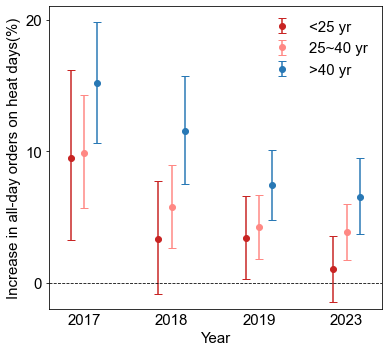

In [13]:
fig, ax = plt.subplots(figsize = (5.5, 5))
for loc, name in enumerate(['17', '18', '19', '23']):
    x, l, u= get_heat_coef('city_'+name+'_bin5_cnt_lowage.csv')
    if loc == 0:
        plt.errorbar([loc-0.15], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[3], capsize = 4, label = '<25 yr')
    else:
        plt.errorbar([loc-0.15], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[3], capsize = 4)
    x, l, u= get_heat_coef('city_'+name+'_bin5_cnt_midage.csv')
    if loc == 0:
        plt.errorbar([loc], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[4], capsize = 4, label = '25~40 yr')
    else:
        plt.errorbar([loc], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[4], capsize = 4)
    x, l, u= get_heat_coef('city_'+name+'_bin5_cnt_highage.csv')
    if loc == 0:
        plt.errorbar([loc+0.15], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[0], capsize = 4, label = '>40 yr')
    else:
        plt.errorbar([loc+0.15], [x], yerr = ([x-l], [u-x]), fmt = 'o', color = colors[0], capsize = 4)
plt.legend(frameon = False, fontsize = 15, loc = 'upper right')
plt.xlim(-0.4, 3.4)
plt.ylim(-0.02, 0.21)
plt.yticks([0, 0.10, 0.20], [0,10,20], size = 15)
plt.xticks([0,1,2,3], ['2017', '2018', '2019', '2023'], size = 15)
ax.tick_params(axis = 'x', length = 0)
celsius_symbol = chr(176)
plt.hlines(0, -0.4, 3.4, color = 'black', ls = '--', lw = 0.8)
plt.xlabel('Year', size = 15)
plt.ylabel('Increase in all-day orders on heat days(%)', size = 15)
plt.tight_layout()
plt.show()